In [75]:
import numpy as np
from matplotlib import pyplot as plt
import math
import hmc_mv
import numpy as np
from scipy.stats import multivariate_normal

In [24]:
rng = np.random.default_rng()

### Visualization of Leapfrog being symplectic

In [ ]:
pi = math.pi

def points_in_circ(r,n=100):
    return [(math.cos(2 * pi / n * x) * r, math.sin(2 * pi / n * x) * r) for x in range(0, n + 1)]

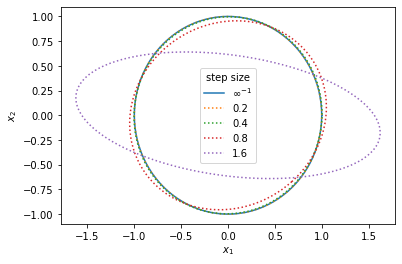

In [19]:
c = np.asarray(points_in_circ(1, n=100))

plt.figure()
plt.plot(c[:, 0], c[:, 1], label=r"$\infty^{-1}$")
plt.xlabel(r"$x_1$")
plt.ylabel(r"$x_2$")

for step_size in [0.2, 0.4, 0.8, 1.6]:
    q = c[:, 0].copy()
    p = c[:, 1].copy()

    p -= 0.5 * step_size * q
    q += step_size * p
    p -= 0.5 * step_size * q
    
    plt.plot(q, p, label=step_size, linestyle=":")

plt.legend(title="step size")


### Visualization of HMC trajectory (single sample)

In [226]:
def vis_target():
    levels = np.linspace(0.01, 0.2, 10)
    N = 200
    X = np.linspace(-4, 4, N)
    Y = np.linspace(-4, 4, N)
    X, Y = np.meshgrid(X, Y)
    pos = np.dstack((X, Y))
    rv = multivariate_normal([0, 0], hmc_mv.m)
    Z = rv.pdf(pos)

    plt.contour(X, Y, Z, cmap="Greys", levels=levels)

Text(0, 0.5, '$q_2$')

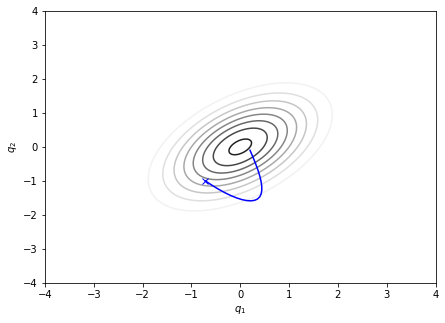

In [227]:
q = np.asarray([0.2, -0.1])
_, traj = hmc_mv.hmc(
    q,
    hmc_mv.neg_log_gaussian_target,
    hmc_mv.neg_log_gaussian_target_gradient,
    0.1,
    20)

q = np.asarray(traj)[:, 0]
traj = np.asarray(traj)

plt.figure(figsize=(7, 5))
vis_target()
plt.plot(traj[:, 0, 0], traj[:, 0, 1], color="blue")
plt.plot(traj[-1, 0, 0], traj[-1, 0, 1], "x", color="blue")
plt.xlabel(r"$q_1$")
plt.ylabel(r"$q_2$")


### Visualization of full HMC sample + convergence to correct covariance matrix

Text(0, 0.5, 'covariance MSE')

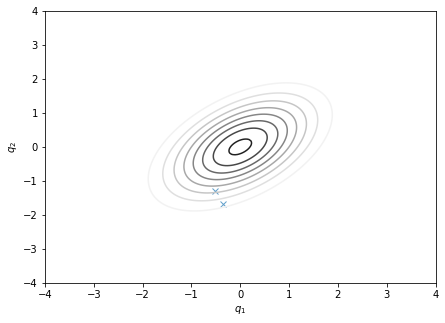

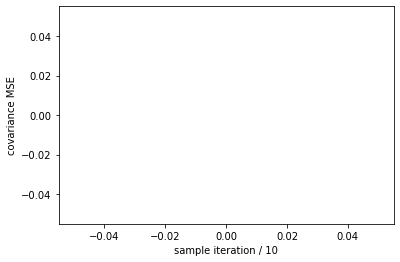

In [228]:
n_iter = 2
cov_error = []
samples = np.zeros(shape=(n_iter, 2))

q = np.array([0.2, -0.1])

for i in range(n_iter):
    q, _ = hmc_mv.hmc(
        q,
        hmc_mv.neg_log_gaussian_target,
        hmc_mv.neg_log_gaussian_target_gradient,
        0.1,
        10)
    samples[i] = q.copy()
    if i > 0 and i % 10 == 0:
        cov_error.append(np.sum((np.cov(samples[:i].T).flatten() - hmc_mv.m.flatten()) ** 2) / 4)

plt.figure(figsize=(7, 5))
plt.plot(samples[:, 0], samples[:, 1], 'x', zorder=-1, alpha=0.7)
vis_target()
plt.xlabel(r"$q_1$")
plt.ylabel(r"$q_2$")

plt.figure()
plt.plot(cov_error)
plt.xlabel("sample iteration / 10")
plt.ylabel("covariance MSE")
